In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df_temp = pd.read_csv("Bias_correction_ucl.csv")
df_temp

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [3]:
df_temp.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [4]:
df_temp.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [5]:
df_temp.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

# EDA

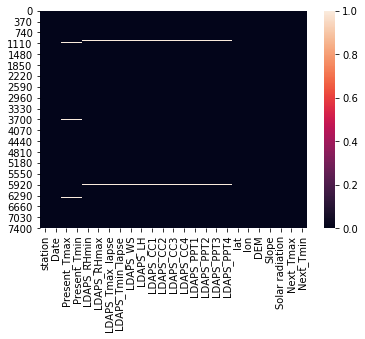

In [6]:
sns.heatmap(df_temp.isnull())

In [7]:
df_temp['Present_Tmax'].fillna(df_temp['Present_Tmax'].mode()[0], inplace=True)
df_temp['Present_Tmin'].fillna(df_temp['Present_Tmin'].mode()[0], inplace=True)
df_temp['LDAPS_RHmin'].fillna(df_temp['LDAPS_RHmin'].mode()[0], inplace=True)
df_temp['LDAPS_RHmax'].fillna(df_temp['LDAPS_RHmax'].mode()[0], inplace=True)
df_temp['LDAPS_Tmax_lapse'].fillna(df_temp['LDAPS_Tmax_lapse'].mode()[0], inplace=True)
df_temp['LDAPS_Tmin_lapse'].fillna(df_temp['LDAPS_Tmin_lapse'].mode()[0], inplace=True)
df_temp['LDAPS_WS'].fillna(df_temp['LDAPS_WS'].mode()[0], inplace=True)

In [8]:
df_temp.isnull().sum()

station              2
Date                 2
Present_Tmax         0
Present_Tmin         0
LDAPS_RHmin          0
LDAPS_RHmax          0
LDAPS_Tmax_lapse     0
LDAPS_Tmin_lapse     0
LDAPS_WS             0
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [9]:
df_temp['LDAPS_LH'].fillna(df_temp['LDAPS_LH'].mode()[0], inplace=True)

In [10]:
df_temp['LDAPS_CC1'].fillna(df_temp['LDAPS_CC1'].mode()[0], inplace=True)
df_temp['LDAPS_CC2'].fillna(df_temp['LDAPS_CC2'].mode()[0], inplace=True)
df_temp['LDAPS_CC3'].fillna(df_temp['LDAPS_CC3'].mode()[0], inplace=True)
df_temp['LDAPS_CC4'].fillna(df_temp['LDAPS_CC4'].mode()[0], inplace=True)
df_temp['LDAPS_PPT1'].fillna(df_temp['LDAPS_PPT1'].mode()[0], inplace=True)
df_temp['LDAPS_PPT2'].fillna(df_temp['LDAPS_PPT2'].mode()[0], inplace=True)
df_temp['LDAPS_PPT3'].fillna(df_temp['LDAPS_PPT3'].mode()[0], inplace=True)
df_temp['LDAPS_PPT4'].fillna(df_temp['LDAPS_PPT4'].mode()[0], inplace=True)
df_temp['Next_Tmax'].fillna(df_temp['Next_Tmax'].mode()[0], inplace=True)
df_temp['Next_Tmin'].fillna(df_temp['Next_Tmin'].mode()[0], inplace=True)

In [11]:
df_temp.isnull().sum()

station             2
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [12]:
df_temp['station'].fillna(df_temp['station'].mode()[0], inplace=True)

In [13]:
df_temp.isnull().sum()

station             0
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [14]:
df_temp['Date'].fillna(df_temp['Date'].mode()[0], inplace=True)

In [15]:
df_temp.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [16]:
df_temp

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,1.0,2013-06-30,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [17]:
df_temp.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [18]:
df_temp['Year'] = df_temp['Date'].str.split('-').str[0]
df_temp['Month'] = df_temp['Date'].str.split('-').str[1]
df_temp['Day'] = df_temp['Date'].str.split('-').str[2]

In [19]:
df_temp

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,2013,06,30
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,2013,06,30
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,2013,06,30
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,2013,06,30
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,2013,06,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,2017,08,30
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,2017,08,30
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,2017,08,30
7750,1.0,2013-06-30,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,2013,06,30


In [20]:
df_temp.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,12.996904,29.782946,23.232056,56.401741,88.089988,29.497459,23.423193,7.057092,61.768678,0.365206,...,0.480310,0.275508,0.266801,37.544722,126.991397,61.867972,1.257048,5341.502803,30.271491,22.934198
std,7.213213,2.960585,2.404154,15.038788,7.715499,3.158976,2.503109,2.212072,34.383864,0.263668,...,1.754900,1.156495,1.200654,0.050352,0.079435,54.279780,1.370444,429.158867,3.123085,2.483502
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.735368,84.038809,27.601014,22.032374,5.647741,36.776474,0.141643,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,30.000000,23.400000,54.828714,89.699505,29.662273,23.735942,6.531345,56.487289,0.312156,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,0.016748,0.007231,0.000000,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [21]:
df_temp.skew()

station             0.000100
Present_Tmax       -0.276483
Present_Tmin       -0.375457
LDAPS_RHmin         0.202176
LDAPS_RHmax        -1.109283
LDAPS_Tmax_lapse   -0.601161
LDAPS_Tmin_lapse   -0.851245
LDAPS_WS            1.485885
LDAPS_LH            0.586176
LDAPS_CC1           0.460727
LDAPS_CC2           0.474379
LDAPS_CC3           0.643064
LDAPS_CC4           0.671739
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.336871
Next_Tmin          -0.406685
Year                0.000365
Month              -0.198626
Day                -0.009133
dtype: float64

In [22]:
df_temp.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
Year                 object
Month                object
Day                  object
dtype: object

In [23]:
df_temp=df_temp.drop(['Date'],axis=1)

In [24]:
df_temp

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,2013,06,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,2013,06,30
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,2013,06,30
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,2013,06,30
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,2013,06,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,2017,08,30
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,2017,08,30
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,2017,08,30
7750,1.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,2013,06,30


In [25]:
df_temp['Year']=df_temp['Year'].astype(int)
df_temp['Month']=df_temp['Month'].astype(int)
df_temp['Day']=df_temp['Day'].astype(int)

In [26]:
df_temp.dtypes

station             float64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
Year                  int64
Month                 int64
Day                   int64
dtype: object

In [27]:
from scipy.stats import zscore
z_score=abs(zscore(df_temp))
print(df_temp.shape)
df_temp_final=df_temp.loc[(z_score<3).all(axis=1)]
print(df_temp_final.shape)

(7752, 27)
(6871, 27)


In [28]:
x=df_temp_final.drop(columns=["Next_Tmax","Next_Tmin"])
y=df_temp_final.iloc[:,-5:-3] #df1 = df.iloc[:,-1]

In [29]:
y

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5
...,...,...
7745,27.6,17.7
7746,28.0,17.1
7747,28.3,18.1
7748,28.6,18.8


In [30]:
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,2013,6,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,2013,6,30
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,2013,6,30
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,2013,6,30
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,2013,6,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,2017,8,30
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,2017,8,30
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,2017,8,30
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,2017,8,30


In [31]:
df_temp_final.fillna(df_temp_final.mean(), inplace=True)

/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


# Modelling

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [33]:
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lr=linear_model.LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    print("r2 score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state 
print("max r2 score corresponding to",final_r_state," is ",max_r_score)

r2 score corresponding to random state:  42 is:  0.7962751486007351
r2 score corresponding to random state:  43 is:  0.7864429099227872
r2 score corresponding to random state:  44 is:  0.7905414526702894
r2 score corresponding to random state:  45 is:  0.7870255151969604
r2 score corresponding to random state:  46 is:  0.7940685670706297
r2 score corresponding to random state:  47 is:  0.7990765222101002
r2 score corresponding to random state:  48 is:  0.7899733723065337
r2 score corresponding to random state:  49 is:  0.7938468444841825
r2 score corresponding to random state:  50 is:  0.7926779056092113
r2 score corresponding to random state:  51 is:  0.7900962028764511
r2 score corresponding to random state:  52 is:  0.799822096454452
r2 score corresponding to random state:  53 is:  0.8034957407937189
r2 score corresponding to random state:  54 is:  0.7824744108328006
r2 score corresponding to random state:  55 is:  0.7815125060282583
r2 score corresponding to random state:  56 is:  

In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring="r2").mean()

0.7103423031593499

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,test_size=0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_predlr=lr.predict(x_test)

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors, cv=5)
gknr.fit(x,y)
gknr.best_params_

/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses mult

{'n_neighbors': 10}

In [37]:
knr=KNeighborsRegressor(n_neighbors=10)
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    knr.fit(x_train,y_train)
    y_pred = knr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    print("r2 score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state 
print("max r2 score corresponding to",final_r_state," is ",max_r_score)

r2 score corresponding to random state:  42 is:  0.5096971901636079
r2 score corresponding to random state:  43 is:  0.5013701081577693
r2 score corresponding to random state:  44 is:  0.5051407085705171
r2 score corresponding to random state:  45 is:  0.5081327875863253
r2 score corresponding to random state:  46 is:  0.5204203490433306
r2 score corresponding to random state:  47 is:  0.5257169487220157
r2 score corresponding to random state:  48 is:  0.49669549879857694
r2 score corresponding to random state:  49 is:  0.5019579599893638
r2 score corresponding to random state:  50 is:  0.5039149874446284
r2 score corresponding to random state:  51 is:  0.48029242603005046
r2 score corresponding to random state:  52 is:  0.4874240729292116
r2 score corresponding to random state:  53 is:  0.5009221778432987
r2 score corresponding to random state:  54 is:  0.4790941497499896
r2 score corresponding to random state:  55 is:  0.46006874123344693
r2 score corresponding to random state:  56 i

In [38]:
from sklearn.model_selection import cross_val_score
print("Mean r2score for kNeighbors Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for kNeighbors Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())

Mean r2score for kNeighbors Regression:  0.12542446682845326
Standard deviation in r2 score for kNeighbors Regression:  0.2344486556055327


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.20)
knr.fit(x_train,y_train)
y_predknr=knr.predict(x_test)

In [40]:
from sklearn.linear_model import Lasso
parameters={"alpha":[0.001,0.01,0.1,1]}
lsreg=Lasso()
glsr = GridSearchCV(lsreg, parameters, cv=5)
glsr.fit(x,y)
glsr.best_params_

/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses mult

{'alpha': 0.1}

In [41]:
lsreg=Lasso(alpha=0.1)
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lsreg.fit(x_train,y_train)
    y_pred = lsreg.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    print("r2 score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state 
print("max r2 score corresponding to",final_r_state," is ",max_r_score)

r2 score corresponding to random state:  42 is:  0.7701852030283111
r2 score corresponding to random state:  43 is:  0.7638163889212056
r2 score corresponding to random state:  44 is:  0.7615267293490264
r2 score corresponding to random state:  45 is:  0.7697162979840613
r2 score corresponding to random state:  46 is:  0.7711475006005064
r2 score corresponding to random state:  47 is:  0.7795693120413618
r2 score corresponding to random state:  48 is:  0.7680676719577271
r2 score corresponding to random state:  49 is:  0.771762641630351
r2 score corresponding to random state:  50 is:  0.7661294124857517
r2 score corresponding to random state:  51 is:  0.7649826927985397
r2 score corresponding to random state:  52 is:  0.7749321152460207
r2 score corresponding to random state:  53 is:  0.7817938418081467
r2 score corresponding to random state:  54 is:  0.75999898634478
r2 score corresponding to random state:  55 is:  0.7633973034404711
r2 score corresponding to random state:  56 is:  0.

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,test_size=0.20)
lsreg.fit(x_train,y_train)
y_predlas=lsreg.predict(x_test)

# Model Selection

In [ ]:
I choose LogisticRegression Model as my preferred model as it performs better on the above dataset.

# Save the Model

In [ ]:
from sklearn.externals import joblib

In [ ]:
joblib.dump(lr,'Model_TempPrediction.csv')